Problem Statement

The company wants to understand and process the data coming out of data engineering pipelines:

• Clean, sanitize and manipulate data to get useful features out of raw fields

• Make sense out of the raw data and help the data science team to build forecasting models on it

Column Profiling:

1) data - tells whether the data is testing or training data

2)trip_creation_time – Timestamp of trip creation

3)route_schedule_uuid – Unique Id for a particular route schedule

4)route_type – Transportation type

> FTL – Full Truck Load: FTL shipments get to the destination sooner, as the truck is making no other pickups or drop-offs along the way

> Carting: Handling system consisting of small vehicles (carts)

5) trip_uuid - Unique ID given to a particular trip (A trip may include different source and destination centers)

6)source_center - Source ID of trip origin

7) source_name - Source Name of trip origin

8) destination_cente – Destination ID

9) destination_name – Destination Name

10) od_start_time – Trip start time

11) od_end_time – Trip end time

12) start_scan_to_end_scan – Time taken to deliver from source to destination

13) is_cutoff – Unknown field

14) cutoff_factor – Unknown field

15) cutoff_timestamp – Unknown field

16) actual_distance_to_destination – Distance in Kms between source and destination warehouse

17) actual_time – Actual time taken to complete the delivery (Cumulative)

18) osrm_time – An open-source routing engine time calculator which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) and gives the time (Cumulative)

19) osrm_distance – An open-source routing engine which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) (Cumulative)

20) factor – Unknown field

21) segment_actual_time – This is a segment time. Time taken by the subset of the package delivery

22) segment_osrm_time – This is the OSRM segment time. Time taken by the subset of the package

23) segment_osrm_distance – This is the OSRM distance. Distance covered by subset of the package delivery

24) segment_factor – Unknown field

In [ ]:
import numpy as np
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm,ttest_ind,ttest_rel,chisquare,chi2_contingency,f_oneway,pearsonr,spearmanr,levene,shapiro,kruskal,kstest

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df = pd.read_csv("delhivery_data.csv")

In [ ]:
df.head(10)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,9,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,18,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,27,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,36,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,False,39,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000
5,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,True,9,2018-09-20 06:15:58,10.403038,15.0,11.0,12.1171,1.363636,15.0,11.0,12.1171,1.363636
6,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,True,18,2018-09-20 05:47:29,18.045481,44.0,17.0,21.2890,2.588235,28.0,6.0,9.1719,4.666667
7,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,True,27,2018-09-20 05:25:58,28.061896,65.0,29.0,35.8252,2.241379,21.0,11.0,14.5362,1.909091
8,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,True,36,2018-09-20 05:15:56,38.939167,76.0,39.0,47.1900,1.948718,10.0,10.0,11.3648,1.000000
9,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,False,43,2018-09-20 04:49:20,43.595802,102.0,45.0,53.2334,2.266667,26.0,6.0,6.0434,4.333333


In [ ]:
df.shape

(144867, 24)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [ ]:
df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor'],
      dtype='object')

In [ ]:
df['trip_creation_time'] = pd.to_datetime(df['trip_creation_time'])
df['od_start_time'] = pd.to_datetime(df['od_start_time'])
df['od_end_time'] = pd.to_datetime(df['od_end_time'])
df['cutoff_timestamp'] = pd.to_datetime(df['cutoff_timestamp'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144867 non-null  object        
 1   trip_creation_time              144867 non-null  datetime64[ns]
 2   route_schedule_uuid             144867 non-null  object        
 3   route_type                      144867 non-null  object        
 4   trip_uuid                       144867 non-null  object        
 5   source_center                   144867 non-null  object        
 6   source_name                     144574 non-null  object        
 7   destination_center              144867 non-null  object        
 8   destination_name                144606 non-null  object        
 9   od_start_time                   144867 non-null  datetime64[ns]
 10  od_end_time                     144867 non-null  datetim

# Dealing with NaN values

In [ ]:
df.isna().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64

In [ ]:
# Removing the rows which have more than 2 NaN values.

ind = df[df.isna().sum(axis=1) >= 2].index
df.drop(index = ind,inplace =True)

In [ ]:
df.isna().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       290
destination_center                  0
destination_name                  258
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64

In [ ]:
# Getting the source modes of different destination centrers.

source_modes = df.groupby("destination_center")["source_name"].transform(lambda x:x.mode()[0] if len(x.mode())>0 else None)
source_modes

<ipython-input-137-6d72325c26e3>:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  source_modes = df.groupby("destination_center")["source_name"].transform(lambda x:x.mode()[0] if len(x.mode())>0 else None)
<ipython-input-137-6d72325c26e3>:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  source_modes = df.groupby("destination_center")["source_name"].transform(lambda x:x.mode()[0] if len(x.mode())>0 else None)


0               Anand_VUNagar_DC (Gujarat)
1               Anand_VUNagar_DC (Gujarat)
2               Anand_VUNagar_DC (Gujarat)
3               Anand_VUNagar_DC (Gujarat)
4               Anand_VUNagar_DC (Gujarat)
                        ...               
144862    Bangalore_Nelmngla_H (Karnataka)
144863    Bangalore_Nelmngla_H (Karnataka)
144864    Bangalore_Nelmngla_H (Karnataka)
144865    Bangalore_Nelmngla_H (Karnataka)
144866    Bangalore_Nelmngla_H (Karnataka)
Name: source_name, Length: 144864, dtype: object

In [ ]:
# Filling the source_name NaNs with their modes with respect to destination_centers

df["source_name"].fillna(source_modes,inplace=True)

In [ ]:
# Getting the destimation modes of different source centrers.

destination_modes = df.groupby("source_center")["destination_name"].transform(lambda x:x.mode()[0] if len(x.mode())>0 else None)
destination_modes

<ipython-input-139-044f577595b0>:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  destination_modes = df.groupby("source_center")["destination_name"].transform(lambda x:x.mode()[0] if len(x.mode())>0 else None)
<ipython-input-139-044f577595b0>:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  destination_modes = df.groupby("source_center")["destination_name"].transform(lambda x:x.mode()[0] if len(x.mode())>0 else None)


0         Khambhat_MotvdDPP_D (Gujarat)
1         Khambhat_MotvdDPP_D (Gujarat)
2         Khambhat_MotvdDPP_D (Gujarat)
3         Khambhat_MotvdDPP_D (Gujarat)
4         Khambhat_MotvdDPP_D (Gujarat)
                      ...              
144862    Gurgaon_Bilaspur_HB (Haryana)
144863    Gurgaon_Bilaspur_HB (Haryana)
144864    Gurgaon_Bilaspur_HB (Haryana)
144865    Gurgaon_Bilaspur_HB (Haryana)
144866    Gurgaon_Bilaspur_HB (Haryana)
Name: destination_name, Length: 144864, dtype: object

In [ ]:
# Filling the destination_name NaNs with their modes with respect to source_centers

df["destination_name"].fillna(destination_modes,inplace=True)

In [ ]:
#Dropping all the remaining NaNs since they are very small amount when comapared to the whole dataset.

df.dropna(inplace=True)

In [ ]:
df.isna().sum()

data                              0
trip_creation_time                0
route_schedule_uuid               0
route_type                        0
trip_uuid                         0
source_center                     0
source_name                       0
destination_center                0
destination_name                  0
od_start_time                     0
od_end_time                       0
start_scan_to_end_scan            0
is_cutoff                         0
cutoff_factor                     0
cutoff_timestamp                  0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
factor                            0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
segment_factor                    0
dtype: int64

# Merging of rows and aggregation of fields

In [ ]:
df.reset_index(drop=True)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,9,2018-09-20 04:27:55.000000,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,18,2018-09-20 04:17:55.000000,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,27,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,36,2018-09-20 03:39:57.000000,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,False,39,2018-09-20 03:33:55.000000,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144820,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,True,45,2018-09-20 21:57:20.000000,45.258278,94.0,60.0,67.9280,1.566667,12.0,12.0,8.1858,1.000000
144821,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,True,54,2018-09-20 21:31:18.000000,54.092531,120.0,76.0,85.6829,1.578947,26.0,21.0,17.3725,1.238095
144822,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,True,63,2018-09-20 21:11:18.000000,66.163591,140.0,88.0,97.0933,1.590909,20.0,34.0,20.7053,0.588235
144823,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,True,72,2018-09-20 20:53:19.000000,73.680667,158.0,98.0,111.2709,1.612245,17.0,27.0,18.8885,0.629630


In [ ]:
df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor'],
      dtype='object')

In [ ]:
agg_action = {'source_name': 'first',
              'destination_name': 'first',
              'trip_creation_time': 'first',
              'route_schedule_uuid': 'first',
              'route_type': 'first',
              'od_start_time': 'first',
              'od_end_time': 'first',
              'start_scan_to_end_scan': 'last',
              'actual_distance_to_destination': 'max',
              'actual_time': 'max',
              'osrm_time': 'max',
              'osrm_distance': 'max',
              'segment_actual_time':'sum',
              'segment_osrm_time': 'sum',
              'segment_osrm_distance': 'sum'}

In [ ]:
df_agg = df.groupby(['trip_uuid','source_center','destination_center']).agg(agg_action).reset_index()
df_agg

,trip_uuid,source_center,destination_center,source_name,destination_name,trip_creation_time,route_schedule_uuid,route_type,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,trip-153671041653548748,IND209304AAA,IND000000ACB,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,349.0,446.5496,728.0,534.0,670.6205
1,trip-153671041653548748,IND462022AAA,IND209304AAA,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,394.0,544.8027,820.0,474.0,649.8528
2,trip-153671042288605164,IND561203AAB,IND562101AAA,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994,46.0,26.0,28.1995
3,trip-153671042288605164,IND572101AAA,IND561203AAB,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,42.0,56.9116,95.0,39.0,55.9899
4,trip-153671043369099517,IND000000ACB,IND160002AAC,Gurgaon_Bilaspur_HB (Haryana),Chandigarh_Mehmdpur_H (Punjab),2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,242.309306,611.0,212.0,281.2109,608.0,231.0,317.7408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26348,trip-153861115439069069,IND628204AAA,IND627657AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),Thisayanvilai_UdnkdiRD_D (Tamil Nadu),2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,2018-10-04 02:29:04.272194,2018-10-04 03:31:11.183797,62.0,33.627182,51.0,41.0,42.5213,49.0,42.0,42.1431
26349,trip-153861115439069069,IND628613AAA,IND627005AAA,Peikulam_SriVnktpm_D (Tamil Nadu),Tirunelveli_VdkkuSrt_I (Tamil Nadu),2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,2018-10-04 04:16:39.894872,2018-10-04 05:47:45.162682,91.0,33.673835,90.0,48.0,40.6080,89.0,77.0,78.5869
26350,trip-153861115439069069,IND628801AAA,IND628204AAA,Eral_Busstand_D (Tamil Nadu),Tirchchndr_Shnmgprm_D (Tamil Nadu),2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,2018-10-04 01:44:53.808000,2018-10-04 02:29:04.272194,44.0,12.661945,30.0,14.0,16.0185,29.0,14.0,16.0184
26351,trip-153861118270144424,IND583119AAA,IND583101AAA,Sandur_WrdN1DPP_D (Karnataka),Bellary_Dc (Karnataka),2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,2018-10-04 03:58:40.726547,2018-10-04 08:46:09.166940,287.0,40.546740,233.0,42.0,52.5303,233.0,42.0,52.5303


# Feature Creation


## Unnesting source_name into states and city.

In [ ]:
df_states = df_agg["source_name"].str.split("(",expand=True)[1]

In [ ]:
df_agg["Source_State"] = df_states.str.replace(')', '')

<ipython-input-148-6b4442d31082>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_agg["Source_State"] = df_states.str.replace(')', '')


In [ ]:
df_agg["source_name"].str.split("(",expand=True)[0]

0           Kanpur_Central_H_6 
1            Bhopal_Trnsport_H 
2        Doddablpur_ChikaDPP_D 
3            Tumkur_Veersagr_I 
4          Gurgaon_Bilaspur_HB 
                  ...          
26348    Tirchchndr_Shnmgprm_D 
26349     Peikulam_SriVnktpm_D 
26350          Eral_Busstand_D 
26351        Sandur_WrdN1DPP_D 
26352                   Hospet 
Name: 0, Length: 26353, dtype: object

In [ ]:
df_agg["City"] = df_agg["source_name"].str.split("(",expand=True)[0].str.split("_",expand=True)[0]

In [ ]:
df_agg

,trip_uuid,source_center,destination_center,source_name,destination_name,trip_creation_time,route_schedule_uuid,route_type,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,Source_State,City
0,trip-153671041653548748,IND209304AAA,IND000000ACB,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,349.0,446.5496,728.0,534.0,670.6205,Uttar Pradesh,Kanpur
1,trip-153671041653548748,IND462022AAA,IND209304AAA,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,394.0,544.8027,820.0,474.0,649.8528,Madhya Pradesh,Bhopal
2,trip-153671042288605164,IND561203AAB,IND562101AAA,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994,46.0,26.0,28.1995,Karnataka,Doddablpur
3,trip-153671042288605164,IND572101AAA,IND561203AAB,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,42.0,56.9116,95.0,39.0,55.9899,Karnataka,Tumkur
4,trip-153671043369099517,IND000000ACB,IND160002AAC,Gurgaon_Bilaspur_HB (Haryana),Chandigarh_Mehmdpur_H (Punjab),2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,242.309306,611.0,212.0,281.2109,608.0,231.0,317.7408,Haryana,Gurgaon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26348,trip-153861115439069069,IND628204AAA,IND627657AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),Thisayanvilai_UdnkdiRD_D (Tamil Nadu),2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,2018-10-04 02:29:04.272194,2018-10-04 03:31:11.183797,62.0,33.627182,51.0,41.0,42.5213,49.0,42.0,42.1431,Tamil Nadu,Tirchchndr
26349,trip-153861115439069069,IND628613AAA,IND627005AAA,Peikulam_SriVnktpm_D (Tamil Nadu),Tirunelveli_VdkkuSrt_I (Tamil Nadu),2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,2018-10-04 04:16:39.894872,2018-10-04 05:47:45.162682,91.0,33.673835,90.0,48.0,40.6080,89.0,77.0,78.5869,Tamil Nadu,Peikulam
26350,trip-153861115439069069,IND628801AAA,IND628204AAA,Eral_Busstand_D (Tamil Nadu),Tirchchndr_Shnmgprm_D (Tamil Nadu),2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,2018-10-04 01:44:53.808000,2018-10-04 02:29:04.272194,44.0,12.661945,30.0,14.0,16.0185,29.0,14.0,16.0184,Tamil Nadu,Eral
26351,trip-153861118270144424,IND583119AAA,IND583101AAA,Sandur_WrdN1DPP_D (Karnataka),Bellary_Dc (Karnataka),2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,2018-10-04 03:58:40.726547,2018-10-04 08:46:09.166940,287.0,40.546740,233.0,42.0,52.5303,233.0,42.0,52.5303,Karnataka,Sandur


In [ ]:
df_agg.rename({"City":"Source_City"},axis=1,inplace=True)

In [ ]:
df_agg["Destination_States"] = df_agg["destination_name"].str.split("(",expand=True)[1].str.replace(')','')

<ipython-input-153-979bd420c83d>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_agg["Destination_States"] = df_agg["destination_name"].str.split("(",expand=True)[1].str.replace(')','')


In [ ]:
df_agg["Destination_City"] = df_agg["destination_name"].str.split("(",expand=True)[0].str.split("_",expand=True)[0]

## Extracting features from the datetime column 'trip_creation_time'.

In [ ]:
df_agg['trip_creation_month'] = df_agg["trip_creation_time"].dt.month

In [ ]:
df_agg["trip_creation_year"] = df_agg["trip_creation_time"].dt.year

In [ ]:
df_agg["trip_creation_day"] = df_agg["trip_creation_time"].dt.day

In [ ]:
df_agg["recorded_time_taken"] = round((df_agg["od_end_time"]-df_agg["od_start_time"]).dt.total_seconds()/60)

In [ ]:
df_agg.drop(columns=["od_start_time","od_end_time"],inplace=True)

In [ ]:
df_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26353 entries, 0 to 26352
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   trip_uuid                       26353 non-null  object        
 1   source_center                   26353 non-null  object        
 2   destination_center              26353 non-null  object        
 3   source_name                     26353 non-null  object        
 4   destination_name                26353 non-null  object        
 5   trip_creation_time              26353 non-null  datetime64[ns]
 6   route_schedule_uuid             26353 non-null  object        
 7   route_type                      26353 non-null  object        
 8   start_scan_to_end_scan          26353 non-null  float64       
 9   actual_distance_to_destination  26353 non-null  float64       
 10  actual_time                     26353 non-null  float64       
 11  os

# Exploratory Data Analysis


In [ ]:
df_agg

,trip_uuid,source_center,destination_center,source_name,destination_name,trip_creation_time,route_schedule_uuid,route_type,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,Source_State,Source_City,Destination_States,Destination_City,trip_creation_month,trip_creation_year,trip_creation_day,recorded_time_taken
0,trip-153671041653548748,IND209304AAA,IND000000ACB,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,1260.0,383.759164,732.0,349.0,446.5496,728.0,534.0,670.6205,Uttar Pradesh,Kanpur,Haryana,Gurgaon,9,2018,12,1261.0
1,trip-153671041653548748,IND462022AAA,IND209304AAA,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,999.0,440.973689,830.0,394.0,544.8027,820.0,474.0,649.8528,Madhya Pradesh,Bhopal,Uttar Pradesh,Kanpur,9,2018,12,1000.0
2,trip-153671042288605164,IND561203AAB,IND562101AAA,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,58.0,24.644021,47.0,26.0,28.1994,46.0,26.0,28.1995,Karnataka,Doddablpur,Karnataka,Chikblapur,9,2018,12,59.0
3,trip-153671042288605164,IND572101AAA,IND561203AAB,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,122.0,48.542890,96.0,42.0,56.9116,95.0,39.0,55.9899,Karnataka,Tumkur,Karnataka,Doddablpur,9,2018,12,123.0
4,trip-153671043369099517,IND000000ACB,IND160002AAC,Gurgaon_Bilaspur_HB (Haryana),Chandigarh_Mehmdpur_H (Punjab),2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,834.0,242.309306,611.0,212.0,281.2109,608.0,231.0,317.7408,Haryana,Gurgaon,Punjab,Chandigarh,9,2018,12,835.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26348,trip-153861115439069069,IND628204AAA,IND627657AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),Thisayanvilai_UdnkdiRD_D (Tamil Nadu),2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,62.0,33.627182,51.0,41.0,42.5213,49.0,42.0,42.1431,Tamil Nadu,Tirchchndr,Tamil Nadu,Thisayanvilai,10,2018,3,62.0
26349,trip-153861115439069069,IND628613AAA,IND627005AAA,Peikulam_SriVnktpm_D (Tamil Nadu),Tirunelveli_VdkkuSrt_I (Tamil Nadu),2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,91.0,33.673835,90.0,48.0,40.6080,89.0,77.0,78.5869,Tamil Nadu,Peikulam,Tamil Nadu,Tirunelveli,10,2018,3,91.0
26350,trip-153861115439069069,IND628801AAA,IND628204AAA,Eral_Busstand_D (Tamil Nadu),Tirchchndr_Shnmgprm_D (Tamil Nadu),2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,44.0,12.661945,30.0,14.0,16.0185,29.0,14.0,16.0184,Tamil Nadu,Eral,Tamil Nadu,Tirchchndr,10,2018,3,44.0
26351,trip-153861118270144424,IND583119AAA,IND583101AAA,Sandur_WrdN1DPP_D (Karnataka),Bellary_Dc (Karnataka),2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,287.0,40.546740,233.0,42.0,52.5303,233.0,42.0,52.5303,Karnataka,Sandur,Karnataka,Bellary,10,2018,3,287.0


In [ ]:
df_agg["Source_State"].nunique()

31

In [ ]:
df_agg["Source_City"].nunique()

1260

In [ ]:
df_agg["Destination_States"].nunique()

32

In [ ]:
df_agg["Destination_City"].nunique()

1256

## Comparison and Visualization of time and distance fields.

In [ ]:
# Converting the data type of month, year, day columns to object from int.

df_agg = df_agg.astype({"trip_creation_month":"object","trip_creation_year":"object","trip_creation_day":"object"})

In [ ]:
df_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26353 entries, 0 to 26352
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   trip_uuid                       26353 non-null  object        
 1   source_center                   26353 non-null  object        
 2   destination_center              26353 non-null  object        
 3   source_name                     26353 non-null  object        
 4   destination_name                26353 non-null  object        
 5   trip_creation_time              26353 non-null  datetime64[ns]
 6   route_schedule_uuid             26353 non-null  object        
 7   route_type                      26353 non-null  object        
 8   start_scan_to_end_scan          26353 non-null  float64       
 9   actual_distance_to_destination  26353 non-null  float64       
 10  actual_time                     26353 non-null  float64       
 11  os

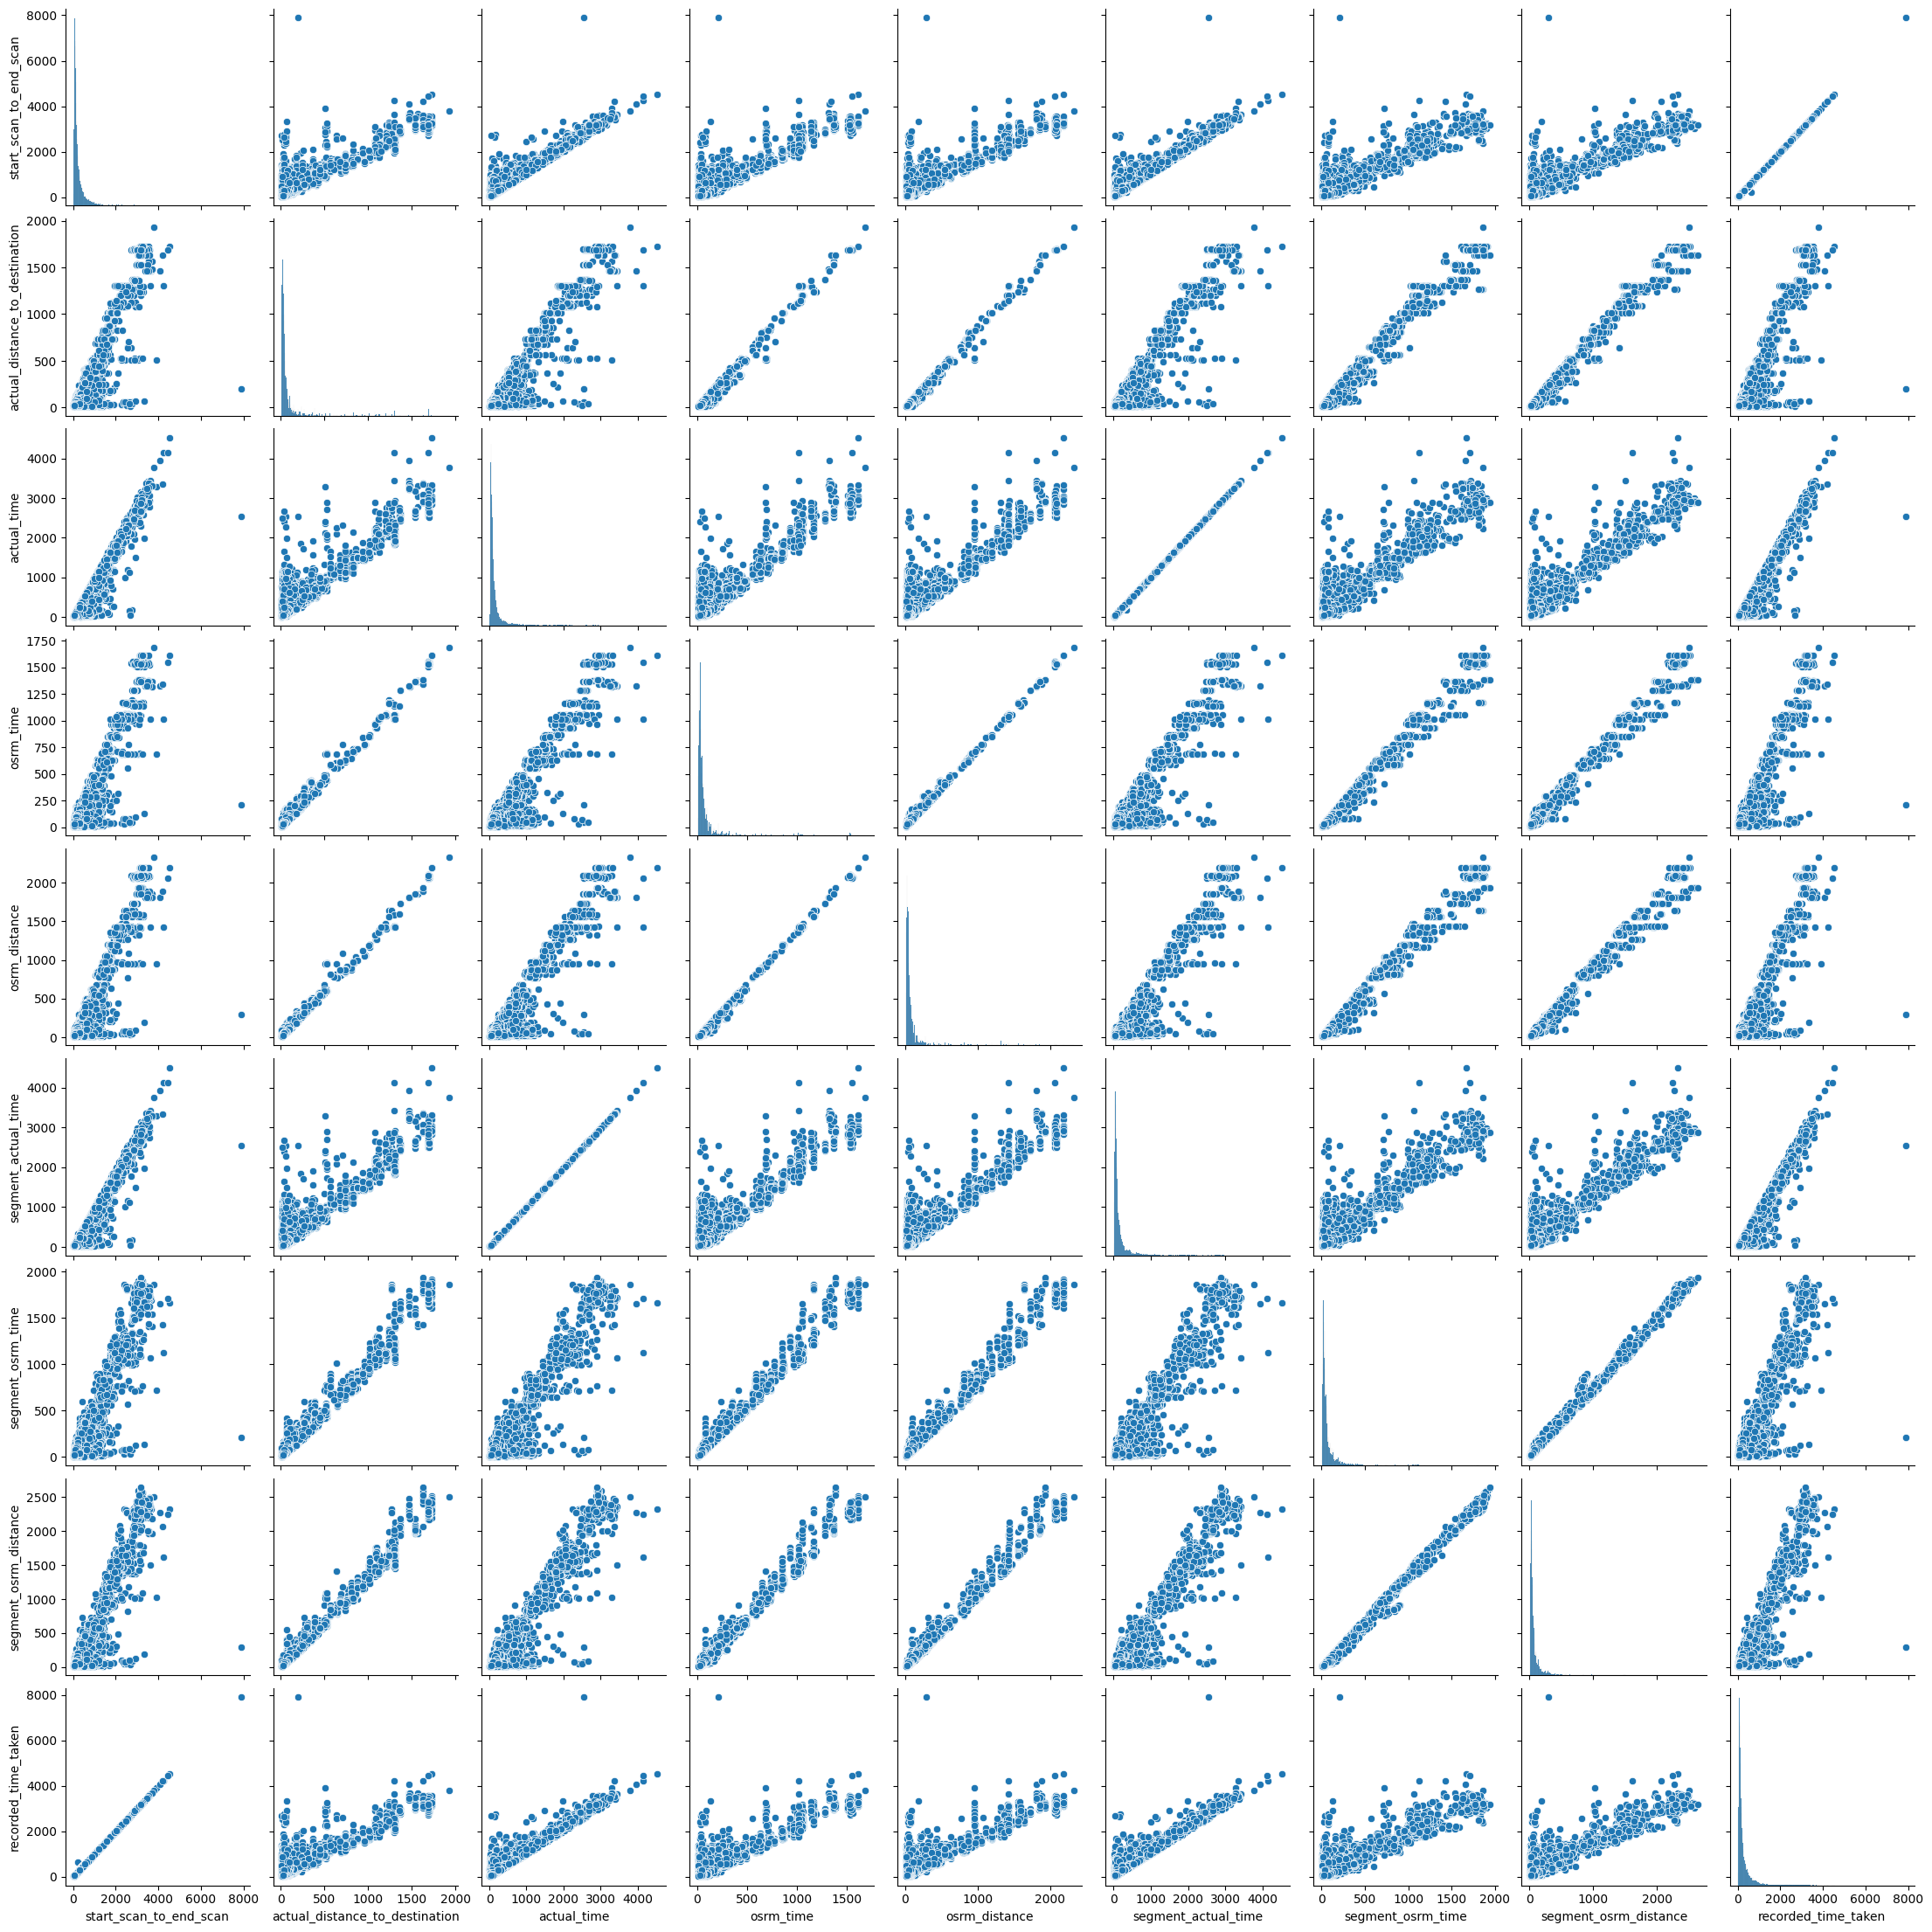

In [ ]:
# Checking the correaltion between all the contnuous varables.

sns.pairplot(data=df_agg, x_vars = ['start_scan_to_end_scan',
       'actual_distance_to_destination', 'actual_time', 'osrm_time',
       'osrm_distance', 'segment_actual_time', 'segment_osrm_time',
       'segment_osrm_distance','recorded_time_taken'],y_vars = ['start_scan_to_end_scan',
       'actual_distance_to_destination', 'actual_time', 'osrm_time',
       'osrm_distance', 'segment_actual_time', 'segment_osrm_time',
       'segment_osrm_distance','recorded_time_taken'])
plt.show()

<ipython-input-169-91c284ea044e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_agg.corr(),annot=True,cmap="coolwarm")


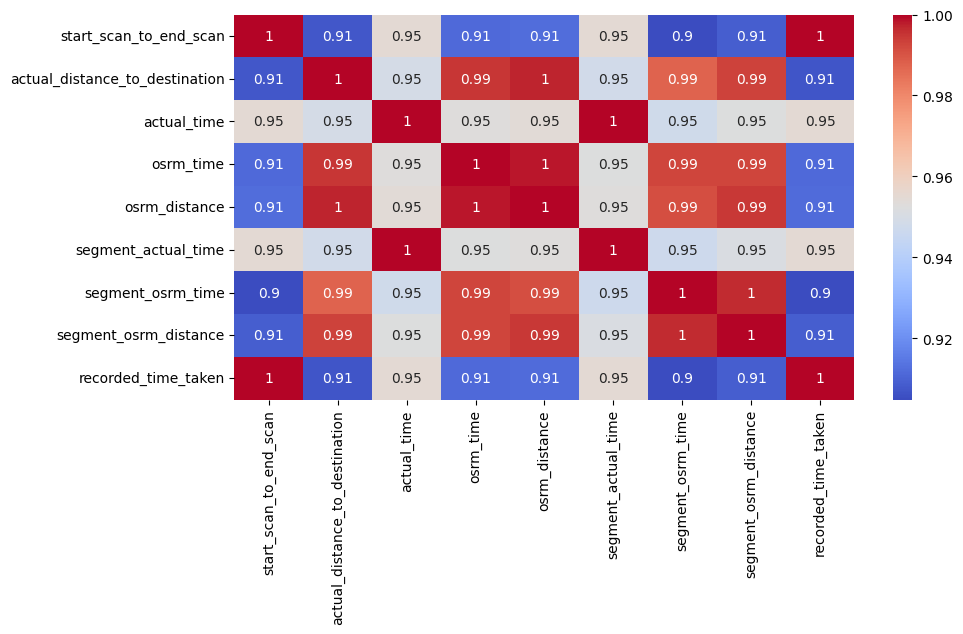

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(df_agg.corr(),annot=True,cmap="coolwarm")
plt.show()

In [ ]:
df_agg.columns

Index(['trip_uuid', 'source_center', 'destination_center', 'source_name',
       'destination_name', 'trip_creation_time', 'route_schedule_uuid',
       'route_type', 'start_scan_to_end_scan',
       'actual_distance_to_destination', 'actual_time', 'osrm_time',
       'osrm_distance', 'segment_actual_time', 'segment_osrm_time',
       'segment_osrm_distance', 'Source_State', 'Source_City',
       'Destination_States', 'Destination_City', 'trip_creation_month',
       'trip_creation_year', 'trip_creation_day', 'recorded_time_taken'],
      dtype='object')

In [ ]:
# Showing which route_type is preferred mostly.

df_agg.groupby("route_type")["trip_uuid"].nunique()

route_type
Carting    8908
FTL        5905
Name: trip_uuid, dtype: int64

In [ ]:
# Top 10 busiest routes

df_busiest_routes = df_agg.groupby(["route_schedule_uuid","source_name","destination_name"])["trip_uuid"].nunique().sort_values(ascending=False).reset_index()
df_busiest_routes.rename({"trip_uuid" : "number_of_trips"},axis=1,inplace=True)
df_busiest_routes.head(10)

,route_schedule_uuid,source_name,destination_name,number_of_trips
0,thanos::sroute:a16bfa03-3462-4bce-9c82-5784c7d...,LowerParel_CP (Maharashtra),Mumbai_Chndivli_PC (Maharashtra),53
1,thanos::sroute:8e6cd941-adb5-4f66-b44f-84938f5...,Mumbai_Chndivli_PC (Maharashtra),Bhiwandi_Mankoli_HB (Maharashtra),46
2,thanos::sroute:c736b86f-5c1d-4497-832c-876db4c...,Gurgaon_Begumpur_CP (Haryana),Gurgaon_Bilaspur_P (Haryana),43
3,thanos::sroute:5f8fb6cf-814a-426f-b2c9-8665b60...,Noida_Sector02_C (Uttar Pradesh),Del_Okhla_PC (Delhi),40
4,thanos::sroute:3a78a6e9-ef19-43ae-832e-e4a3868...,Hyderabad_Alwal_L (Telangana),Hyderabad_Shamshbd_H (Telangana),39
5,thanos::sroute:5dd1132a-b8a0-4b55-9df1-0893760...,Mumbai Hub (Maharashtra),Mumbai_Sanpada_I (Maharashtra),37
6,thanos::sroute:b743d024-a50a-40a4-8ffd-e3b420b...,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),36
7,thanos::sroute:faef8565-4919-4d38-b5a6-a81f9c1...,Mumbai Hub (Maharashtra),Mumbai_CottonGreen_DPC (Maharashtra),34
8,thanos::sroute:7dfd6e35-53b0-4fa5-8b99-da92a9c...,Bangalore_Nelmngla_H (Karnataka),Bengaluru_KGAirprt_HB (Karnataka),33
9,thanos::sroute:bd9338bc-f287-4575-b6c0-19be17b...,Mumbai_CottonGreen_DPC (Maharashtra),Mumbai Hub (Maharashtra),33


<Axes: xlabel='number_of_trips', ylabel='route_schedule_uuid'>

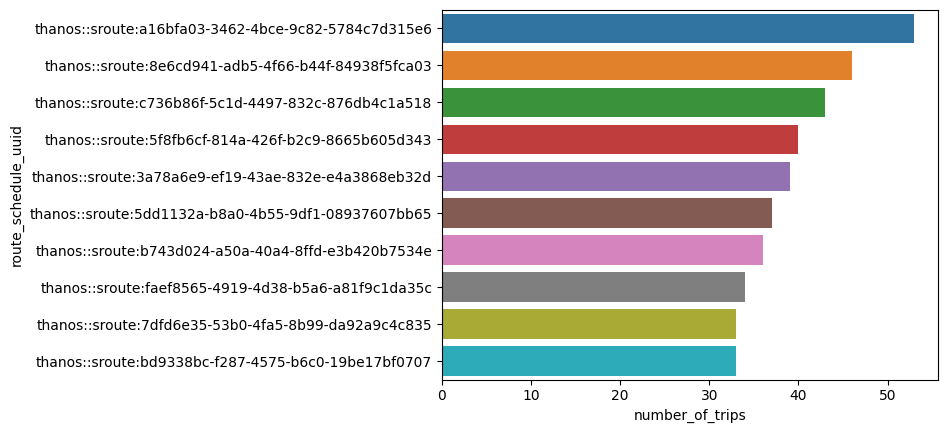

In [ ]:
sns.barplot(data = df_busiest_routes.head(10),y= "route_schedule_uuid",x="number_of_trips")

In [ ]:
# No. of places in different states to where delivery is possible.

df_agg.groupby("Destination_States")["Destination_City"].nunique().sort_values(ascending=False)

Destination_States
Uttar Pradesh             125
Karnataka                 106
Tamil Nadu                103
Maharashtra               101
West Bengal                92
Rajasthan                  91
Andhra Pradesh             75
Telangana                  67
Gujarat                    65
Bihar                      64
Madhya Pradesh             62
Kerala                     56
Punjab                     42
Assam                      40
Haryana                    36
Orissa                     34
Himachal Pradesh           20
Jharkhand                  19
Uttarakhand                18
Arunachal Pradesh           8
Chhattisgarh                8
Delhi                       7
Jammu & Kashmir             4
Goa                         4
Meghalaya                   3
Mizoram                     3
Chandigarh                  2
Pondicherry                 2
Tripura                     2
Nagaland                    1
Dadra and Nagar Haveli      1
Daman & Diu                 1
Name: Destination_Cit

In [ ]:
# No. of places in different states from where delivery is possible.

df_agg.groupby("Source_State")["Source_City"].nunique().sort_values(ascending=False)

Source_State
Uttar Pradesh             125
Tamil Nadu                109
Karnataka                 108
Maharashtra               102
West Bengal                90
Rajasthan                  89
Andhra Pradesh             76
Gujarat                    65
Telangana                  65
Bihar                      63
Madhya Pradesh             59
Kerala                     57
Punjab                     41
Assam                      39
Orissa                     38
Haryana                    36
Himachal Pradesh           23
Uttarakhand                20
Jharkhand                  18
Arunachal Pradesh          11
Chhattisgarh                8
Delhi                       5
Goa                         4
Jammu & Kashmir             4
Meghalaya                   3
Mizoram                     3
Pondicherry                 2
Chandigarh                  2
Nagaland                    1
Tripura                     1
Dadra and Nagar Haveli      1
Name: Source_City, dtype: int64

In [ ]:
# Cities from where most deliveries take place.

df_city_del_cnt = df_agg.groupby("Source_City").agg({"trip_uuid":"count"}).reset_index()
df_city_del_cnt.sort_values("trip_uuid",ascending = False,inplace=True)
df_city_del_cnt.head(10)

,Source_City,trip_uuid
424,Gurgaon,1141
139,Bengaluru,1136
171,Bhiwandi,821
102,Bangalore,808
783,Mumbai,719
302,Delhi,629
469,Hyderabad,575
234,Chandigarh,529
959,Pune,490
241,Chennai,400


<Axes: xlabel='trip_uuid', ylabel='Source_City'>

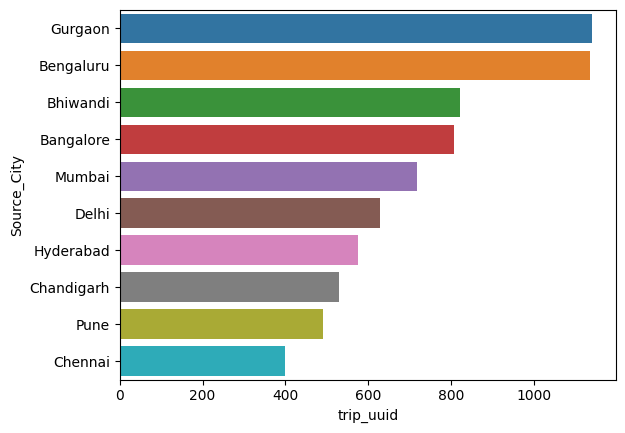

In [ ]:
sns.barplot(df_city_del_cnt.head(10),y="Source_City",x="trip_uuid")

In [ ]:
# Cities which recieve the most deliveries.

df_city_dest_cnt = df_agg.groupby("Destination_City").agg({"trip_uuid":"count"}).reset_index()
df_city_dest_cnt.sort_values("trip_uuid",ascending = False,inplace=True)
df_city_dest_cnt.head(10)

,Destination_City,trip_uuid
141,Bengaluru,1180
776,Mumbai,1000
418,Gurgaon,987
105,Bangalore,694
461,Hyderabad,643
170,Bhiwandi,617
296,Delhi,586
231,Chandigarh,556
238,Chennai,472
1130,Sonipat,390


<Axes: xlabel='trip_uuid', ylabel='Destination_City'>

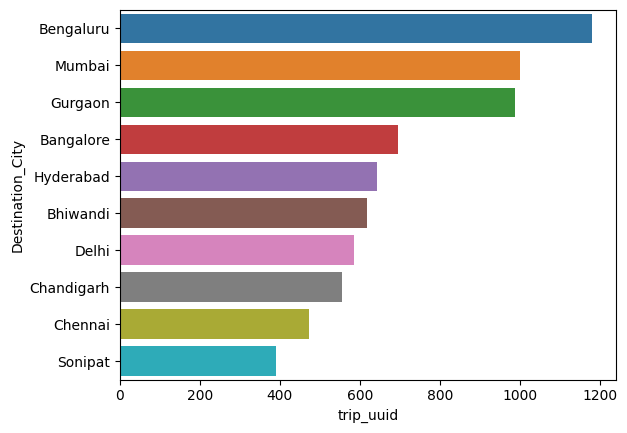

In [ ]:
sns.barplot(df_city_dest_cnt.head(10),y="Destination_City",x="trip_uuid")

In [ ]:
df_agg.describe()

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,recorded_time_taken
count,26353.000000,26353.000000,26353.000000,26353.000000,26353.000000,26353.000000,26353.000000,26353.000000,26353.000000
mean,298.230979,92.568285,200.747998,91.089781,115.278986,198.920313,101.698365,125.451895,298.747429
std,440.482128,209.534820,384.954842,185.841669,254.138514,381.383524,215.709989,286.010710,440.488506
min,20.000000,9.001351,9.000000,6.000000,9.072900,9.000000,6.000000,9.072900,21.000000
25%,90.000000,21.724584,51.000000,25.000000,27.836400,50.000000,25.000000,28.464400,91.000000
50%,152.000000,35.232211,84.000000,39.000000,43.753000,83.000000,42.000000,45.937400,153.000000
75%,307.000000,66.099316,168.000000,73.000000,86.520700,166.000000,79.000000,91.285200,307.000000
max,7898.000000,1927.447705,4532.000000,1686.000000,2326.199100,4504.000000,1938.000000,2640.924700,7899.000000


**Insights from EDA:**

1) Delhivery can deliver products from 31 different states to 32 different states.

2) Subsequently, it can deliver products from 1260 different cities to 1256 different cities.

3) All the continuous variables are highly positively correlated, which implies that similar features can be removed from the dataset.

4) Carting route type is preferred over FTL route type, since there are more number of deliveries made on that type.

5) Busiest routes are mostly from Maharashtra state with 6 routes in top 10 busiest routes.

6) Uttar Pradesh, Karnataka, Tamil Nadu, Maharashtra and West Bengal are top 5 most connected states with highest number of places as source and destination.

7) Gurgaon and Bengaluru are the cities from where highest number of deliveries takes place.

8) Bengaluru and Mumbai are the cities which recieve highest number of deliveries.

9) actual_distance_to_destination has a mean of 92.568 which represents the mean distance of all the deliveries. Min. distance being 9 and max. distance being 1927.44.

10) actual_time has a mean of 200.75 which represents the mean time taken to make a delivery.

11) start_scan_to_end_scan and recorded_time_taken have very similar ranges and mean values. Mean values are 298.23 and 298.74 respectively, while ranges are [20,7898] and [21,7899].

# Outlier Treatment

I have decided to use IQR method for outliers treatment.

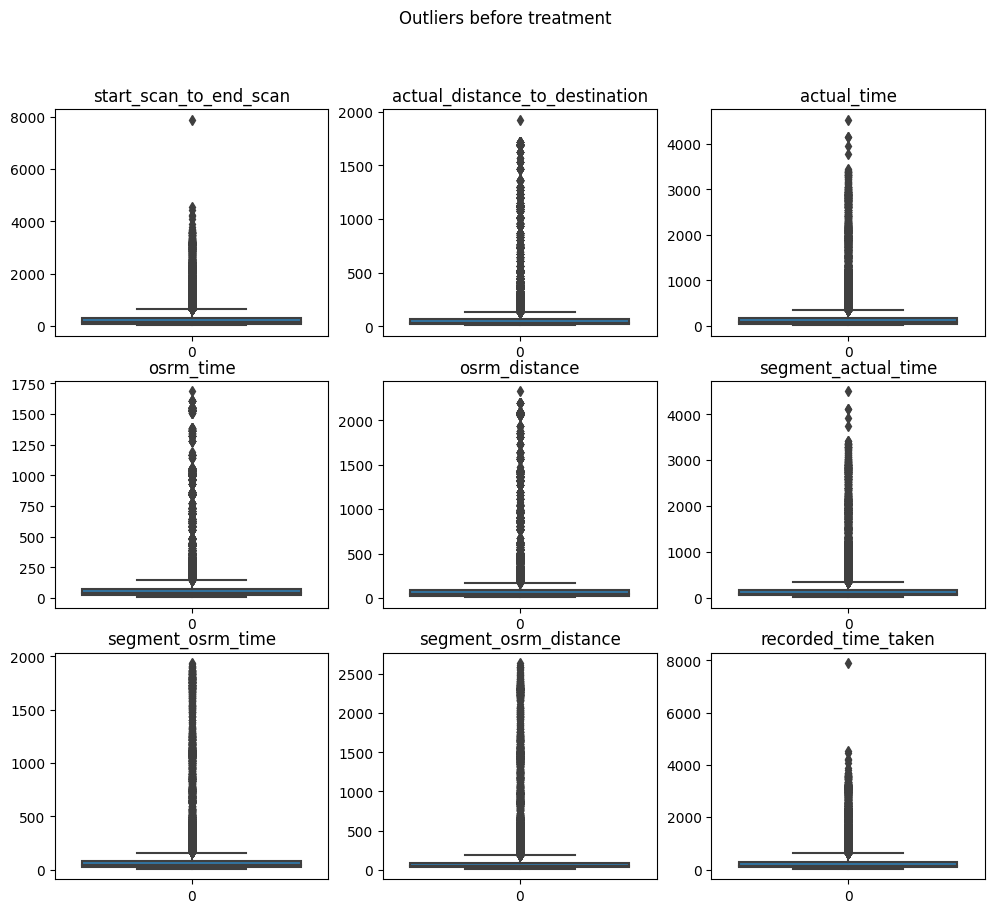

In [ ]:
# Before the IQR treatment method.

fig=plt.figure(figsize=(12,10))

plt.subplot(3,3,1)
sns.boxplot(df_agg['start_scan_to_end_scan'])
plt.title('start_scan_to_end_scan')

plt.subplot(3,3,2)
sns.boxplot(df_agg['actual_distance_to_destination'])
plt.title('actual_distance_to_destination')

plt.subplot(3,3,3)
sns.boxplot(df_agg['actual_time'])
plt.title('actual_time')

plt.subplot(3,3,4)
sns.boxplot(df_agg['osrm_time'])
plt.title('osrm_time')

plt.subplot(3,3,5)
sns.boxplot(df_agg['osrm_distance'])
plt.title('osrm_distance')

plt.subplot(3,3,6)
sns.boxplot(df_agg['segment_actual_time'])
plt.title('segment_actual_time')

plt.subplot(3,3,7)
sns.boxplot(df_agg['segment_osrm_time'])
plt.title('segment_osrm_time')

plt.subplot(3,3,8)
sns.boxplot(df_agg['segment_osrm_distance'])
plt.title('segment_osrm_distance')

plt.subplot(3,3,9)
sns.boxplot(df_agg['recorded_time_taken'])
plt.title('recorded_time_taken')

fig.suptitle("Outliers before treatment")

plt.show()

In [ ]:
# column: start_scan_to_end_scan

def outliers(df,ft):
    q1 = df_agg[ft].quantile(0.25)
    q3 = df_agg[ft].quantile(0.75)
    IQR = q3-q1
    lower_limit = q1-1.5*IQR
    upper_limit = q3+1.5*IQR

    ls = df_agg.index[(df_agg[ft] < lower_limit) | (df_agg[ft] > upper_limit) ]

    return ls

# print("Q1:",q1)
# print("Q3:",q3)
# print("IQR:",IQR)
# print("Upper limit:", upper_limit)
# print("Lower limit:", lower_limit)

In [ ]:
index_list=[]
for feature in ['start_scan_to_end_scan','actual_distance_to_destination', 'actual_time', 'osrm_time','osrm_distance', 'segment_actual_time', 'segment_osrm_time','segment_osrm_distance','recorded_time_taken']:
  index_list.extend(outliers(df_agg,feature))

In [ ]:
len(index_list)

27247

In [ ]:
len(sorted(set(index_list)))

4688

In [ ]:
def remove(df,ls):
    ls=sorted(set(ls))
    df.drop(index=ls,inplace=True)

    return df

In [ ]:
df_cleaned = remove(df_agg,index_list)

In [ ]:
df_cleaned.reset_index(drop=True,inplace=True)

In [ ]:
df_cleaned

,trip_uuid,source_center,destination_center,source_name,destination_name,trip_creation_time,route_schedule_uuid,route_type,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,Source_State,Source_City,Destination_States,Destination_City,trip_creation_month,trip_creation_year,trip_creation_day,recorded_time_taken
0,trip-153671042288605164,IND561203AAB,IND562101AAA,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,58.0,24.644021,47.0,26.0,28.1994,46.0,26.0,28.1995,Karnataka,Doddablpur,Karnataka,Chikblapur,9,2018,12,59.0
1,trip-153671042288605164,IND572101AAA,IND561203AAB,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,122.0,48.542890,96.0,42.0,56.9116,95.0,39.0,55.9899,Karnataka,Tumkur,Karnataka,Doddablpur,9,2018,12,123.0
2,trip-153671046011330457,IND400072AAB,IND401104AAA,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,100.0,17.175274,59.0,15.0,19.6800,59.0,16.0,19.8766,Maharashtra,Mumbai Hub,Maharashtra,Mumbai,9,2018,12,100.0
3,trip-153671052974046625,IND583101AAA,IND583201AAA,Bellary_Dc (Karnataka),Hospet (Karnataka),2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,152.0,59.530350,147.0,46.0,63.6461,147.0,45.0,63.6461,Karnataka,Bellary,Karnataka,Hospet,9,2018,12,152.0
4,trip-153671052974046625,IND583119AAA,IND583101AAA,Sandur_WrdN1DPP_D (Karnataka),Bellary_Dc (Karnataka),2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,485.0,41.317614,131.0,44.0,53.5761,130.0,44.0,53.5761,Karnataka,Sandur,Karnataka,Bellary,9,2018,12,486.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21660,trip-153861115439069069,IND628204AAA,IND627657AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),Thisayanvilai_UdnkdiRD_D (Tamil Nadu),2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,62.0,33.627182,51.0,41.0,42.5213,49.0,42.0,42.1431,Tamil Nadu,Tirchchndr,Tamil Nadu,Thisayanvilai,10,2018,3,62.0
21661,trip-153861115439069069,IND628613AAA,IND627005AAA,Peikulam_SriVnktpm_D (Tamil Nadu),Tirunelveli_VdkkuSrt_I (Tamil Nadu),2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,91.0,33.673835,90.0,48.0,40.6080,89.0,77.0,78.5869,Tamil Nadu,Peikulam,Tamil Nadu,Tirunelveli,10,2018,3,91.0
21662,trip-153861115439069069,IND628801AAA,IND628204AAA,Eral_Busstand_D (Tamil Nadu),Tirchchndr_Shnmgprm_D (Tamil Nadu),2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,44.0,12.661945,30.0,14.0,16.0185,29.0,14.0,16.0184,Tamil Nadu,Eral,Tamil Nadu,Tirchchndr,10,2018,3,44.0
21663,trip-153861118270144424,IND583119AAA,IND583101AAA,Sandur_WrdN1DPP_D (Karnataka),Bellary_Dc (Karnataka),2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,287.0,40.546740,233.0,42.0,52.5303,233.0,42.0,52.5303,Karnataka,Sandur,Karnataka,Bellary,10,2018,3,287.0


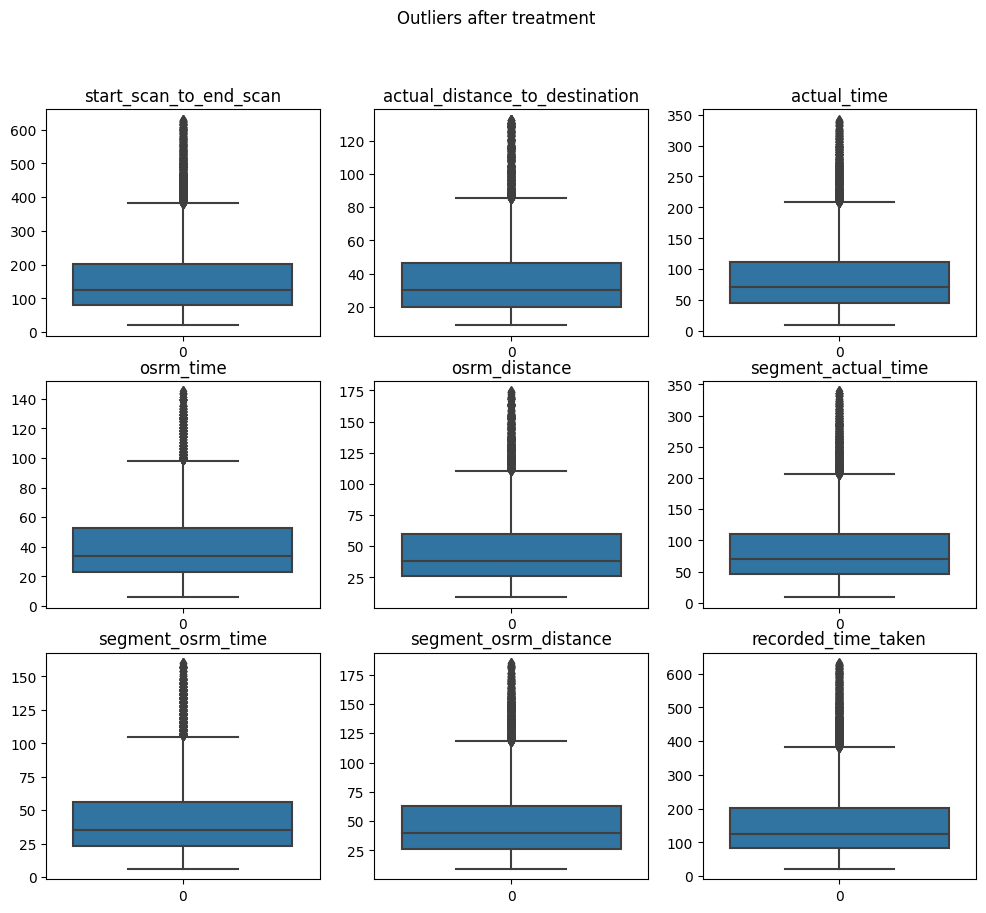

In [ ]:
columns = ['start_scan_to_end_scan','actual_distance_to_destination', 'actual_time',
'osrm_time','osrm_distance', 'segment_actual_time', 'segment_osrm_time','segment_osrm_distance','recorded_time_taken']

# After the IQR treatment method.

fig=plt.figure(figsize=(12,10))

plt.subplot(3,3,1)
sns.boxplot(df_cleaned['start_scan_to_end_scan'])
plt.title('start_scan_to_end_scan')

plt.subplot(3,3,2)
sns.boxplot(df_cleaned['actual_distance_to_destination'])
plt.title('actual_distance_to_destination')

plt.subplot(3,3,3)
sns.boxplot(df_cleaned['actual_time'])
plt.title('actual_time')

plt.subplot(3,3,4)
sns.boxplot(df_cleaned['osrm_time'])
plt.title('osrm_time')

plt.subplot(3,3,5)
sns.boxplot(df_cleaned['osrm_distance'])
plt.title('osrm_distance')

plt.subplot(3,3,6)
sns.boxplot(df_cleaned['segment_actual_time'])
plt.title('segment_actual_time')

plt.subplot(3,3,7)
sns.boxplot(df_cleaned['segment_osrm_time'])
plt.title('segment_osrm_time')

plt.subplot(3,3,8)
sns.boxplot(df_cleaned['segment_osrm_distance'])
plt.title('segment_osrm_distance')

plt.subplot(3,3,9)
sns.boxplot(df_cleaned['recorded_time_taken'])
plt.title('recorded_time_taken')

fig.suptitle("Outliers after treatment")

plt.show()

# Hypothesis Testing.

## Checking is there any significant difference between columns **'start_scan_to_end_scan'** and **'recorded_time_taken'**

Null Hypothesis(Ho) : There is no statistically significant relationship between the times in both column.

Alternate Hypothesis(Ha) : There is a significant linear realtionship between the columns.

Significance Level: 5%

Here I am using Pearson correaltion test since both are contiuous variables.

In [ ]:
sig_level = 0.05
test_stat,p_value = pearsonr(df_cleaned["start_scan_to_end_scan"],df_cleaned['recorded_time_taken'])

if p_value<sig_level:
  print("Reject the Null Hypothesis")
else:
  print("Failed to reject the Null Hypothesis")

# print(test_stat,p_value)

Reject the Null Hypothesis


<Axes: xlabel='start_scan_to_end_scan', ylabel='recorded_time_taken'>

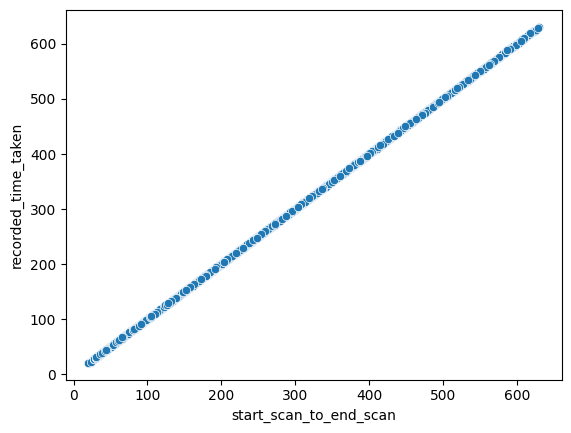

In [ ]:
sns.scatterplot(data = df_cleaned, x = "start_scan_to_end_scan", y = 'recorded_time_taken')

Since the test tells us to Reject the Null Hypothesis, its proven that there is a statistically significant linear relationship between the times in both the columns and they are dependent on each other.

## Checking is there any significant difference between columns **'actual_time'** and **'osrm_time'**

Null Hypothesis(Ho) : There is no statistically significant relationship between the times in actual_time and osrm_time columns.

Alternate Hypothesis(Ha) : There is a statistically significant linear realtionship between the columns.

Significance Level: 5%

Here I am using Pearson correaltion test since both are continuous variables.

In [ ]:
sig_level = 0.05
t_stat,p_value = pearsonr(df_cleaned["actual_time"],df_cleaned['osrm_time'])
# print(t_stat,p_value)

if p_value<sig_level:
  print("Reject the Null Hypothesis")
else:
  print("Failed to reject the Null Hypothesis")

Reject the Null Hypothesis


<Axes: xlabel='actual_time', ylabel='osrm_time'>

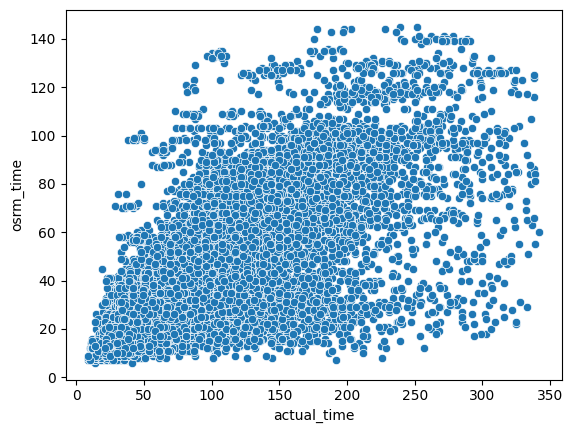

In [ ]:
sns.scatterplot(data=df_cleaned, x = "actual_time", y ="osrm_time")

Since the test tells us to Reject the Null Hypothesis, its proven that there is a statistically significant linear relationship between the times in both the columns and they are dependent on each other.

## Checking is there any significant difference between columns **'actual_time'** and **'segment_actual_time'**

Null Hypothesis(Ho) : There is no statistically significant relationship between the times in actual_time and segment_actual_time columns.

Alternate Hypothesis(Ha) : There is a statistically significant linear realtionship between the columns.

Significance Level: 5%

Here I am using Pearson correaltion test since both are continuous variables.

In [ ]:
sig_level = 0.05
t_stat,p_value = pearsonr(df_cleaned["actual_time"],df_cleaned['segment_actual_time'])
# print(t_stat,p_value)

if p_value<sig_level:
  print("Reject the Null Hypothesis")
else:
  print("Failed to reject the Null Hypothesis")

Reject the Null Hypothesis


<Axes: xlabel='actual_time', ylabel='segment_actual_time'>

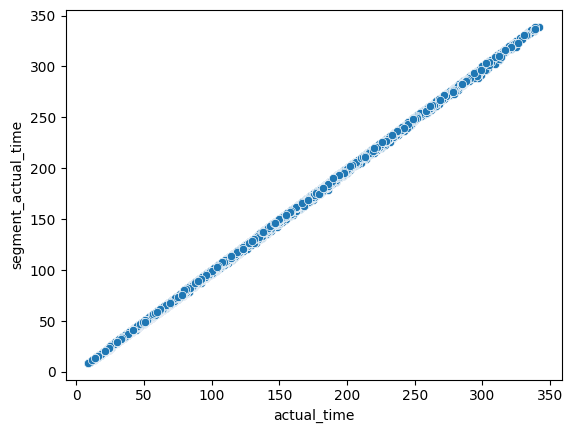

In [ ]:
sns.scatterplot(data=df_cleaned,x="actual_time",y="segment_actual_time")

Since the test tells us to Reject the Null Hypothesis, its proven that there is a statistically significant linear relationship between the times in both the columns and they are dependent on each other.

## Checking is there any significant difference between columns **'osrm_distance'** and **'segment_osrm_distance'**

Null Hypothesis(Ho) : There is no statistically significant relationship between the distances in osrm_distance and segment_osrm_distance columns.

Alternate Hypothesis(Ha) : There is a statistically significant linear realtionship between the columns.

Significance Level: 5%

Here I am using Pearson correaltion test since both are continuous variables.

In [ ]:
sig_level = 0.05
t_stat,p_value = pearsonr(df_cleaned["osrm_distance"],df_cleaned['segment_osrm_distance'])
# print(t_stat,p_value)

if p_value<sig_level:
  print("Reject the Null Hypothesis")
else:
  print("Failed to reject the Null Hypothesis")

Reject the Null Hypothesis


<Axes: xlabel='osrm_distance', ylabel='segment_osrm_distance'>

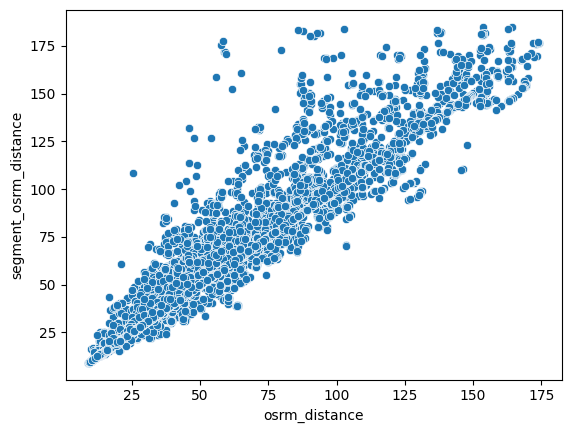

In [ ]:
sns.scatterplot(data=df_cleaned,x="osrm_distance",y="segment_osrm_distance")

Since the test tells us to Reject the Null Hypothesis, its proven that there is a statistically significant linear relationship between the distances in both the columns and they are dependent on each other.

## Checking is there any significant difference between columns **'osrm_time'** and **'segment_osrm_time'**

Null Hypothesis(Ho) : There is no statistically significant relationship between the times in osrm_time and segment_osrm_time columns.

Alternate Hypothesis(Ha) : There is a statistically significant linear relationship between the columns.

Significance Level: 5%

Here I am using Pearson correlation test since both are continuous variables.

In [ ]:
sig_level = 0.05
t_stat,p_value = pearsonr(df_cleaned["osrm_time"],df_cleaned['segment_osrm_time'])
# print(t_stat,p_value)

if p_value<sig_level:
  print("Reject the Null Hypothesis")
else:
  print("Failed to reject the Null Hypothesis")

Reject the Null Hypothesis


<Axes: xlabel='osrm_time', ylabel='segment_osrm_time'>

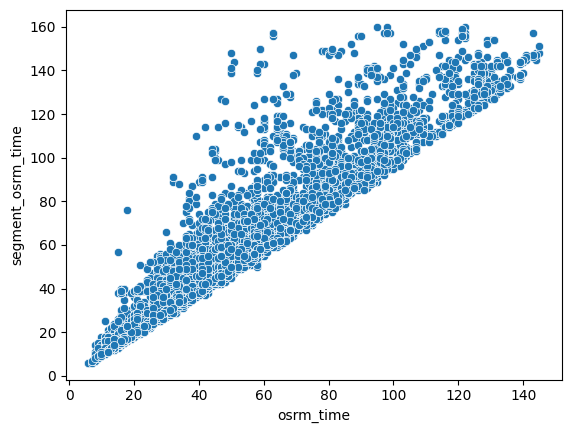

In [ ]:
sns.scatterplot(data=df_cleaned,x="osrm_time",y="segment_osrm_time")

Since the test tells us to Reject the Null Hypothesis, its proven that there is a statistically significant linear relationship between the times in both the columns and they are dependent on each other.

## Checking is there any significant difference between columns **'actual_distance_to_destination'** and **'osrm_distance'**

Null Hypothesis(Ho) : There is no statistically significant relationship between the distances in actual_distance_to_destination and osrm_distance.

Alternate Hypothesis(Ha) : There is a statistically significant linear relationship between the columns.

Significance Level: 5%

Here I am using Pearson correlation test since both are continuous variables.

In [ ]:
sig_level = 0.05
t_stat,p_value = pearsonr(df_cleaned["actual_distance_to_destination"],df_cleaned['osrm_distance'])
# print(t_stat,p_value)

if p_value<sig_level:
  print("Reject the Null Hypothesis")
else:
  print("Failed to reject the Null Hypothesis")

Reject the Null Hypothesis


<Axes: xlabel='actual_distance_to_destination', ylabel='osrm_distance'>

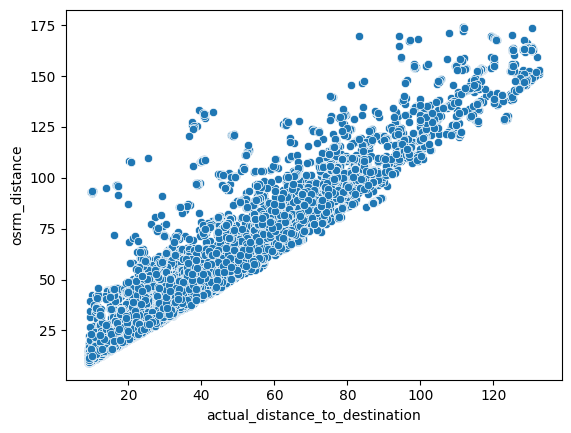

In [ ]:
sns.scatterplot(data=df_cleaned,x="actual_distance_to_destination",y="osrm_distance")

Since the test tells us to Reject the Null Hypothesis, its proven that there is a statistically significant linear relationship between the distances in both the columns and they are dependent on each other.

From all the hypothesis tests its clear that there is a linear relationship between the variables and they are dependent on each other. So removing one of the columns won't effect the dataset and the analysis.

In [ ]:
# Dropping the columns whose dropping wont effect the analysis.

df_cleaned.drop(columns=["recorded_time_taken","osrm_time","segment_actual_time","segment_osrm_distance","segment_osrm_time","osrm_distance"],inplace=True)

In [ ]:
df_cleaned

,trip_uuid,source_center,destination_center,source_name,destination_name,trip_creation_time,route_schedule_uuid,route_type,start_scan_to_end_scan,actual_distance_to_destination,actual_time,Source_State,Source_City,Destination_States,Destination_City,trip_creation_month,trip_creation_year,trip_creation_day
0,trip-153671042288605164,IND561203AAB,IND562101AAA,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,58.0,24.644021,47.0,Karnataka,Doddablpur,Karnataka,Chikblapur,9,2018,12
1,trip-153671042288605164,IND572101AAA,IND561203AAB,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,122.0,48.542890,96.0,Karnataka,Tumkur,Karnataka,Doddablpur,9,2018,12
2,trip-153671046011330457,IND400072AAB,IND401104AAA,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,100.0,17.175274,59.0,Maharashtra,Mumbai Hub,Maharashtra,Mumbai,9,2018,12
3,trip-153671052974046625,IND583101AAA,IND583201AAA,Bellary_Dc (Karnataka),Hospet (Karnataka),2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,152.0,59.530350,147.0,Karnataka,Bellary,Karnataka,Hospet,9,2018,12
4,trip-153671052974046625,IND583119AAA,IND583101AAA,Sandur_WrdN1DPP_D (Karnataka),Bellary_Dc (Karnataka),2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,485.0,41.317614,131.0,Karnataka,Sandur,Karnataka,Bellary,9,2018,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21660,trip-153861115439069069,IND628204AAA,IND627657AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),Thisayanvilai_UdnkdiRD_D (Tamil Nadu),2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,62.0,33.627182,51.0,Tamil Nadu,Tirchchndr,Tamil Nadu,Thisayanvilai,10,2018,3
21661,trip-153861115439069069,IND628613AAA,IND627005AAA,Peikulam_SriVnktpm_D (Tamil Nadu),Tirunelveli_VdkkuSrt_I (Tamil Nadu),2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,91.0,33.673835,90.0,Tamil Nadu,Peikulam,Tamil Nadu,Tirunelveli,10,2018,3
21662,trip-153861115439069069,IND628801AAA,IND628204AAA,Eral_Busstand_D (Tamil Nadu),Tirchchndr_Shnmgprm_D (Tamil Nadu),2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,44.0,12.661945,30.0,Tamil Nadu,Eral,Tamil Nadu,Tirchchndr,10,2018,3
21663,trip-153861118270144424,IND583119AAA,IND583101AAA,Sandur_WrdN1DPP_D (Karnataka),Bellary_Dc (Karnataka),2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,287.0,40.546740,233.0,Karnataka,Sandur,Karnataka,Bellary,10,2018,3


# Encoding the categorical variables.

In [ ]:
# Encoding categorical varaibles. Like encoding route_type column where Carting = 0 and FTL = 1.

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
col = "route_type"
df_cleaned[col] = label_encoder.fit_transform(df_cleaned[col])

In [ ]:
df_cleaned

,trip_uuid,source_center,destination_center,source_name,destination_name,trip_creation_time,route_schedule_uuid,route_type,start_scan_to_end_scan,actual_distance_to_destination,actual_time,Source_State,Source_City,Destination_States,Destination_City,trip_creation_month,trip_creation_year,trip_creation_day
0,trip-153671042288605164,IND561203AAB,IND562101AAA,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,0,58.0,24.644021,47.0,Karnataka,Doddablpur,Karnataka,Chikblapur,9,2018,12
1,trip-153671042288605164,IND572101AAA,IND561203AAB,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,0,122.0,48.542890,96.0,Karnataka,Tumkur,Karnataka,Doddablpur,9,2018,12
2,trip-153671046011330457,IND400072AAB,IND401104AAA,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,0,100.0,17.175274,59.0,Maharashtra,Mumbai Hub,Maharashtra,Mumbai,9,2018,12
3,trip-153671052974046625,IND583101AAA,IND583201AAA,Bellary_Dc (Karnataka),Hospet (Karnataka),2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,1,152.0,59.530350,147.0,Karnataka,Bellary,Karnataka,Hospet,9,2018,12
4,trip-153671052974046625,IND583119AAA,IND583101AAA,Sandur_WrdN1DPP_D (Karnataka),Bellary_Dc (Karnataka),2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,1,485.0,41.317614,131.0,Karnataka,Sandur,Karnataka,Bellary,9,2018,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21660,trip-153861115439069069,IND628204AAA,IND627657AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),Thisayanvilai_UdnkdiRD_D (Tamil Nadu),2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,0,62.0,33.627182,51.0,Tamil Nadu,Tirchchndr,Tamil Nadu,Thisayanvilai,10,2018,3
21661,trip-153861115439069069,IND628613AAA,IND627005AAA,Peikulam_SriVnktpm_D (Tamil Nadu),Tirunelveli_VdkkuSrt_I (Tamil Nadu),2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,0,91.0,33.673835,90.0,Tamil Nadu,Peikulam,Tamil Nadu,Tirunelveli,10,2018,3
21662,trip-153861115439069069,IND628801AAA,IND628204AAA,Eral_Busstand_D (Tamil Nadu),Tirchchndr_Shnmgprm_D (Tamil Nadu),2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,0,44.0,12.661945,30.0,Tamil Nadu,Eral,Tamil Nadu,Tirchchndr,10,2018,3
21663,trip-153861118270144424,IND583119AAA,IND583101AAA,Sandur_WrdN1DPP_D (Karnataka),Bellary_Dc (Karnataka),2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,1,287.0,40.546740,233.0,Karnataka,Sandur,Karnataka,Bellary,10,2018,3


# Normalization of continuous varaibles.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df_cont = df_cleaned[["start_scan_to_end_scan","actual_distance_to_destination","actual_time"]]


In [ ]:
df_cont_m=MinMaxScaler().fit_transform(df_cont)
df_cont_m

array([[0.06229508, 0.12656744, 0.11411411],
       [0.16721311, 0.31993716, 0.26126126],
       [0.13114754, 0.06613657, 0.15015015],
       ...,
       [0.03934426, 0.02961847, 0.06306306],
       [0.43770492, 0.25523898, 0.67267267],
       [0.07540984, 0.13377483, 0.0990991 ]])

<Axes: >

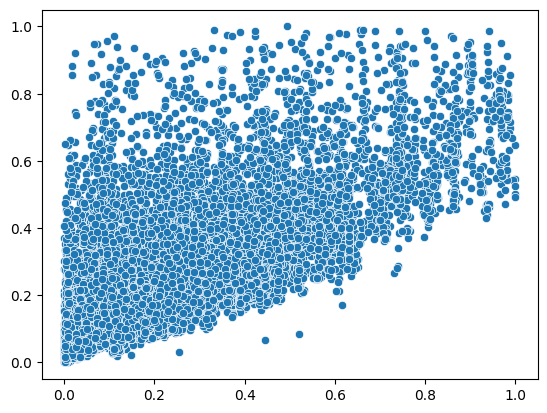

In [ ]:
sns.scatterplot(x=df_cont_m[:,1],y=df_cont_m[:,2])

Relationship between actual_distance_to_destination and actual_time. This appears to be fairly linear.
